# Liver Disease Prediction using Machine Learning

**Course:** CU6051NI – Artificial Intelligence  
**Student Name:** Pranay Shakya  
**London Met ID:** 23050330  

## Algorithms Used
- K-Nearest Neighbor (KNN)
- Logistic Regression
- Random Forest
- XGBoost


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("liver_disease_dataset.csv")
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nBasic Statistics:\n{df.describe()}")

DATASET INFORMATION
Dataset Shape: (18011, 10)

Column Names:
['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id', 'futime', 'status']

Data Types:
Unnamed: 0      int64
id              int64
age             int64
male            int64
weight        float64
height        float64
bmi           float64
case.id       float64
futime          int64
status          int64
dtype: object

Missing Values:
Unnamed: 0       0
id               0
age              0
male             0
weight        4873
height        3204
bmi           5057
case.id         31
futime           0
status           0
dtype: int64

Basic Statistics:
         Unnamed: 0            id           age          male        weight  \
count  18011.000000  18011.000000  18011.000000  18011.000000  13138.000000   
mean    8731.061129   9009.034534     52.701183      0.466992     86.206348   
std     5071.312144   5193.754862     14.580062      0.498923     22.269605   
min        1.000000      1.000000     18.0

In [4]:
#Handle missing values
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

df.replace("NA", np.nan, inplace=True)
print(f"Missing values before imputation:\n{df.isnull().sum()}")


DATA PREPROCESSING
Missing values before imputation:
Unnamed: 0       0
id               0
age              0
male             0
weight        4873
height        3204
bmi           5057
case.id         31
futime           0
status           0
dtype: int64


In [5]:
# Impute numerical columns with median
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

/var/folders/4l/7dt18mg50xq3yzsmqdptkh3c0000gn/T/ipykernel_19204/631994707.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [6]:
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,83.6,169.0,28.828876,1871.0,1836,1


In [7]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'status']

In [9]:
print(f"\nMissing values after imputation:\n{df.isnull().sum()}")
print(f"\nFinal dataset shape: {df.shape}")


Missing values after imputation:
Unnamed: 0    0
id            0
age           0
male          0
weight        0
height        0
bmi           0
case.id       0
futime        0
status        0
dtype: int64

Final dataset shape: (18011, 10)


In [10]:
# Target variable analysis
target_column = "status"
print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)
print(f"Class Distribution:\n{df[target_column].value_counts()}")
print(f"\nClass Proportions:\n{df[target_column].value_counts(normalize=True)}")


TARGET VARIABLE ANALYSIS
Class Distribution:
status
0    16629
1     1382
Name: count, dtype: int64

Class Proportions:
status
0    0.923269
1    0.076731
Name: proportion, dtype: float64


<Axes: ylabel='count'>

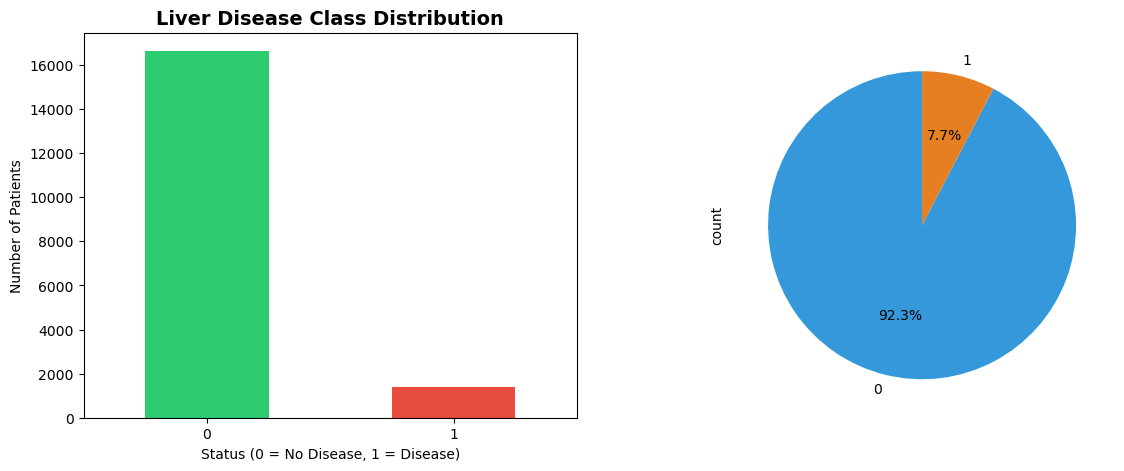

In [49]:
# Visualization 1: Class Distribution Bar Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df[target_column].value_counts().plot(kind="bar", ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title("Liver Disease Class Distribution", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Status (0 = No Disease, 1 = Disease)")
axes[0].set_ylabel("Number of Patients")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
# Visualization 2: Pie Chart
colors = ['#3498db', '#e67e22']
df[target_column].value_counts().plot(
    kind="pie", 
    ax=axes[1],
    autopct="%1.1f%%", 
    startangle=90,
    colors=colors
)

In [21]:
axes[1].set_title("Proportion of Liver Disease Cases", fontsize=14, fontweight='bold')
axes[1].set_ylabel("")

Text(638.0681818181818, 0.5, '')

In [22]:
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

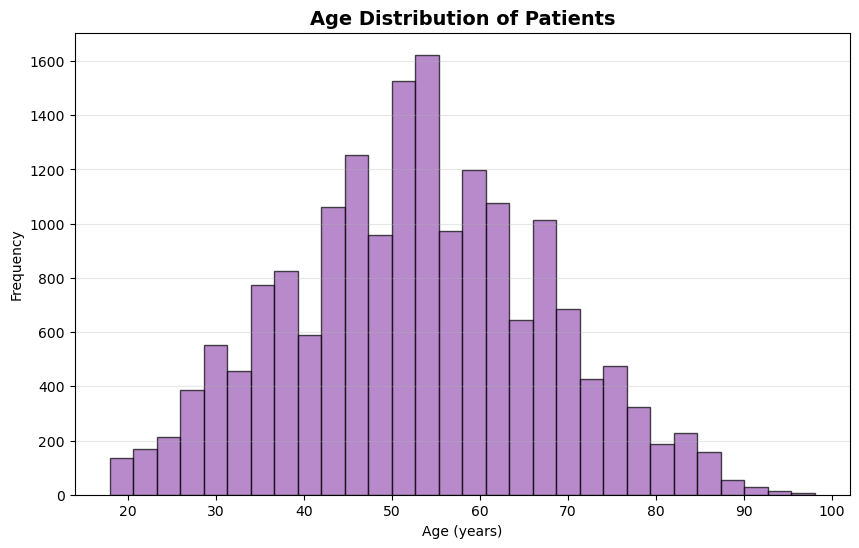

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df["age"], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
plt.title("Age Distribution of Patients", fontsize=14, fontweight='bold')
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

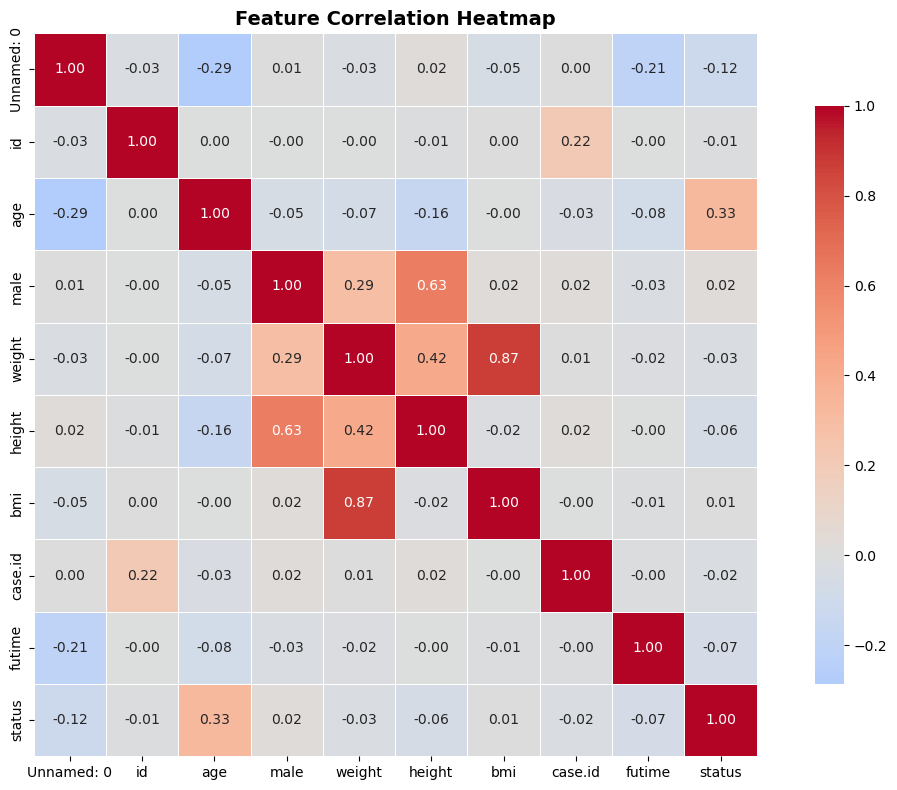

In [24]:
# Visualization 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f',
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Visualization 5: Box Plot for Outlier Detection (Example: SGOT)
if 'sgot' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y='sgot', color='#1abc9c')
    plt.title("SGOT Enzyme Levels - Outlier Detection", fontsize=14, fontweight='bold')
    plt.ylabel("SGOT Level")
    plt.savefig('sgot_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()


DATA SPLITTING
Feature matrix shape: (18011, 9)
Target vector shape: (18011,)


In [51]:
# Prepare features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print("\n" + "="*60)
print("DATA SPLITTING")
print("="*60)
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")



DATA SPLITTING
Feature matrix shape: (18011, 9)
Target vector shape: (18011,)
Training set size: 14408 (80.0%)
Test set size: 3603 (20.0%)
Training set class distribution:
status
0    13302
1     1106
Name: count, dtype: int64
Test set class distribution:
status
0    3327
1     276
Name: count, dtype: int64


In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")

Training set size: 14408 (80.0%)
Test set size: 3603 (20.0%)
Training set class distribution:
status
0    13302
1     1106
Name: count, dtype: int64
Test set class distribution:
status
0    3327
1     276
Name: count, dtype: int64


In [28]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed using StandardScaler")


Feature scaling completed using StandardScaler


In [29]:
# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

print("\n" + "="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)


MODEL TRAINING AND EVALUATION


In [31]:
# Train and evaluate models
results = {}
predictions = {}
confusion_matrices = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")
    
    # Use scaled data for KNN and Logistic Regression
    if name in ["KNN", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Store predictions
    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Calculate metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
    }
    
    # Store confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))


Training: KNN

Classification Report for KNN:
              precision    recall  f1-score   support

  No Disease       0.93      0.99      0.96      3327
     Disease       0.45      0.10      0.16       276

    accuracy                           0.92      3603
   macro avg       0.69      0.54      0.56      3603
weighted avg       0.89      0.92      0.90      3603


Training: Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  No Disease       0.93      0.99      0.96      3327
     Disease       0.54      0.09      0.16       276

    accuracy                           0.92      3603
   macro avg       0.74      0.54      0.56      3603
weighted avg       0.90      0.92      0.90      3603


Training: Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

  No Disease       0.94      0.99      0.96      3327
     Disease       0.67      0.21      0.32 

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [16:58:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
# Display results table
results_df = pd.DataFrame(results).T
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(results_df.round(4))


MODEL PERFORMANCE COMPARISON
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
KNN                    0.9217     0.4500  0.0978    0.1607   0.6878
Logistic Regression    0.9245     0.5417  0.0942    0.1605   0.8236
Random Forest          0.9317     0.6705  0.2138    0.3242   0.8350
XGBoost                0.9270     0.5496  0.2609    0.3538   0.8325


In [33]:
# Save results to CSV
results_df.to_csv('model_performance_results.csv')
print("\n✓ Results saved to 'model_performance_results.csv'")


✓ Results saved to 'model_performance_results.csv'


In [34]:
# Find best model
best_model_name = results_df['Recall'].idxmax()
print(f"Best Model (based on Recall): {best_model_name}")
print(f"   Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")
print(f"   Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")

Best Model (based on Recall): XGBoost
   Recall: 0.2609
   Accuracy: 0.9270


/var/folders/4l/7dt18mg50xq3yzsmqdptkh3c0000gn/T/ipykernel_19204/3548400049.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(results_df.index, rotation=45, ha='right')


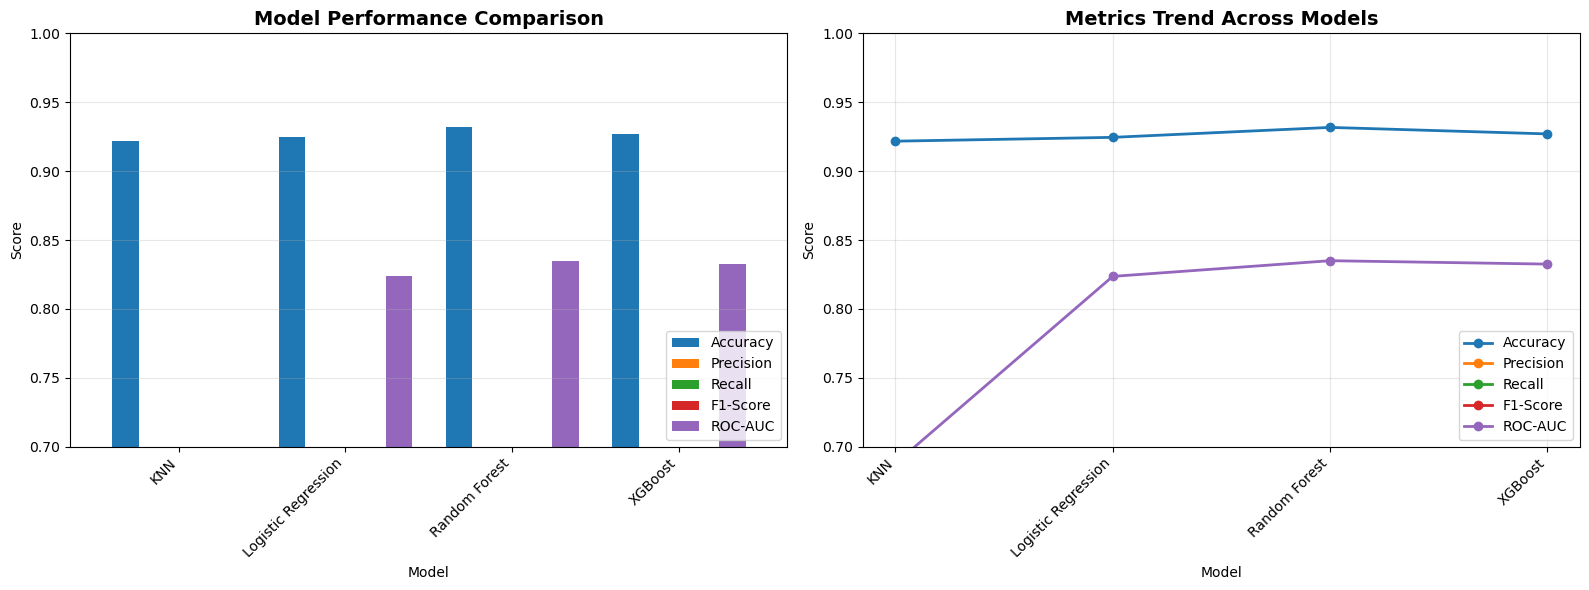

In [37]:
# Visualization 6: Model Performance Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
results_df.plot(kind="bar", ax=axes[0], width=0.8)
axes[0].set_title("Model Performance Comparison", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Score")
axes[0].set_xlabel("Model")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend(loc='lower right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.7, 1.0])
for metric in results_df.columns:
    axes[1].plot(results_df.index, results_df[metric], marker='o', label=metric, linewidth=2)
axes[1].set_title("Metrics Trend Across Models", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Model")
axes[1].set_ylabel("Score")
axes[1].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.7, 1.0])
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

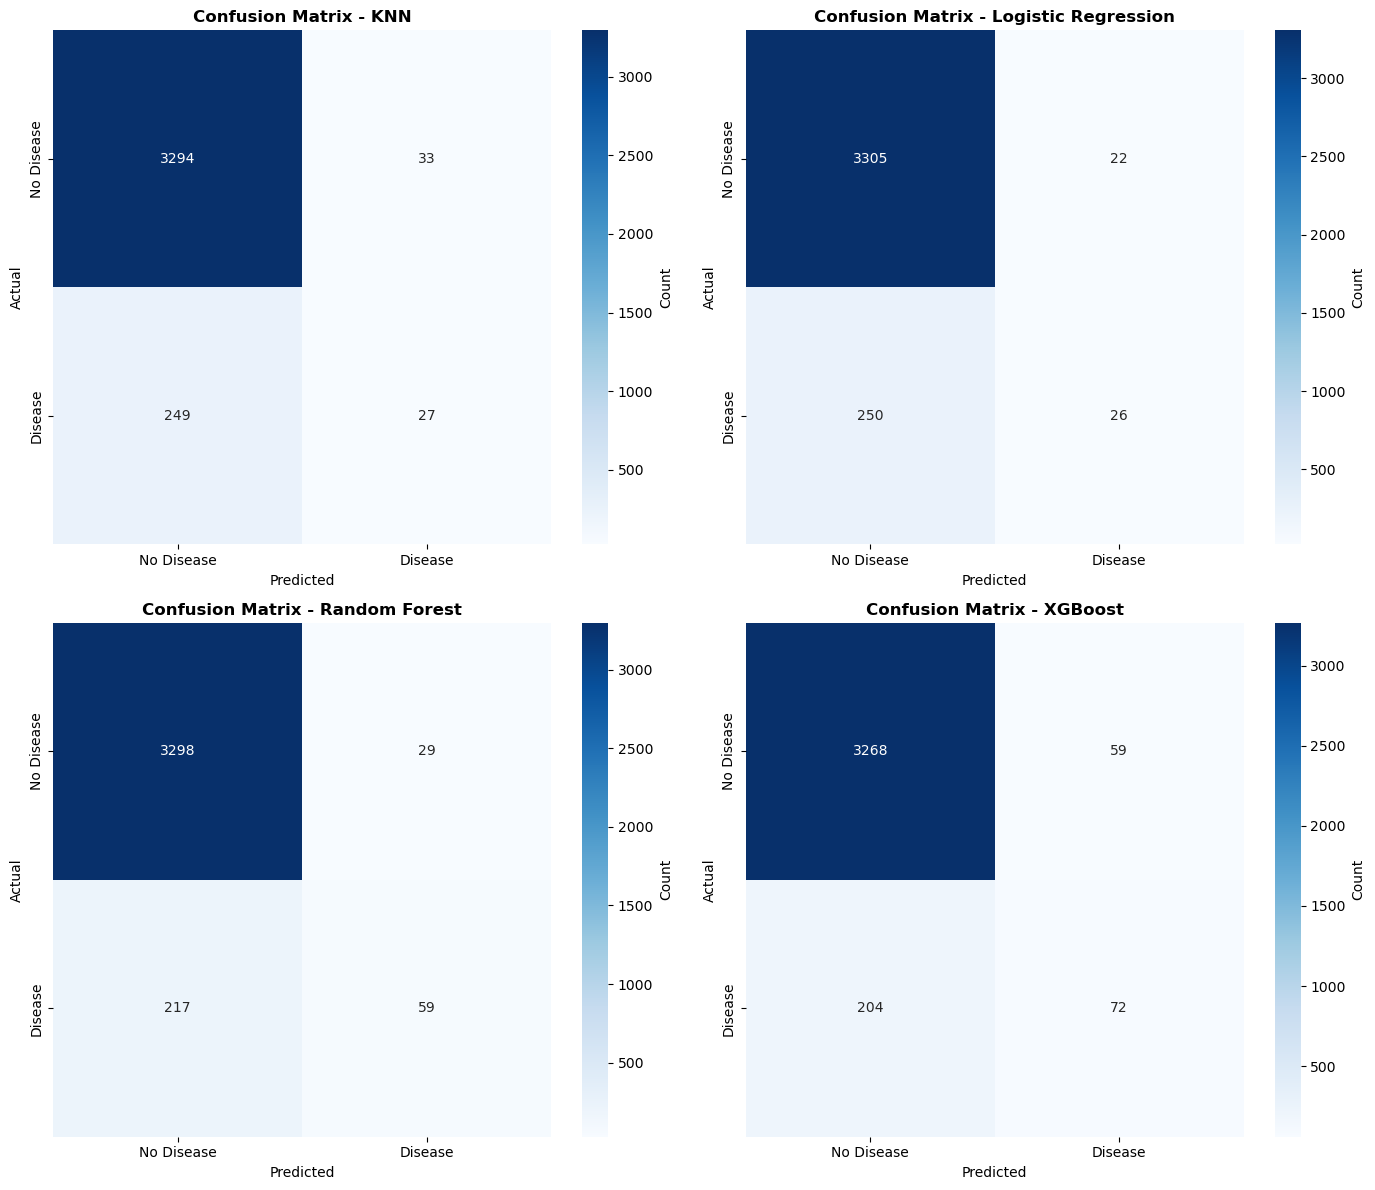

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(
        cm, 
        annot=True, 
        fmt="d", 
        cmap="Blues",
        ax=axes[idx],
        cbar_kws={'label': 'Count'},
        xticklabels=['No Disease', 'Disease'],
        yticklabels=['No Disease', 'Disease']
    )
    axes[idx].set_title(f"Confusion Matrix - {name}", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.savefig('confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.show()


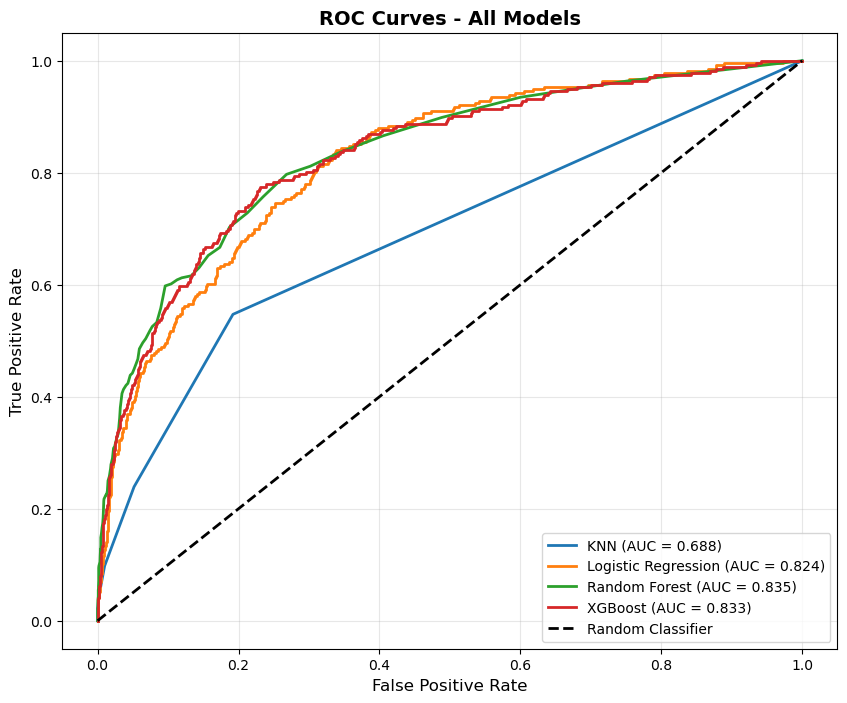

In [42]:
from sklearn.metrics import (roc_curve)
# Visualization 8: ROC Curves for All Models
plt.figure(figsize=(10, 8))

for name in models.keys():
    y_pred_proba = predictions[name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = results[name]['ROC-AUC']
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.savefig('roc_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()


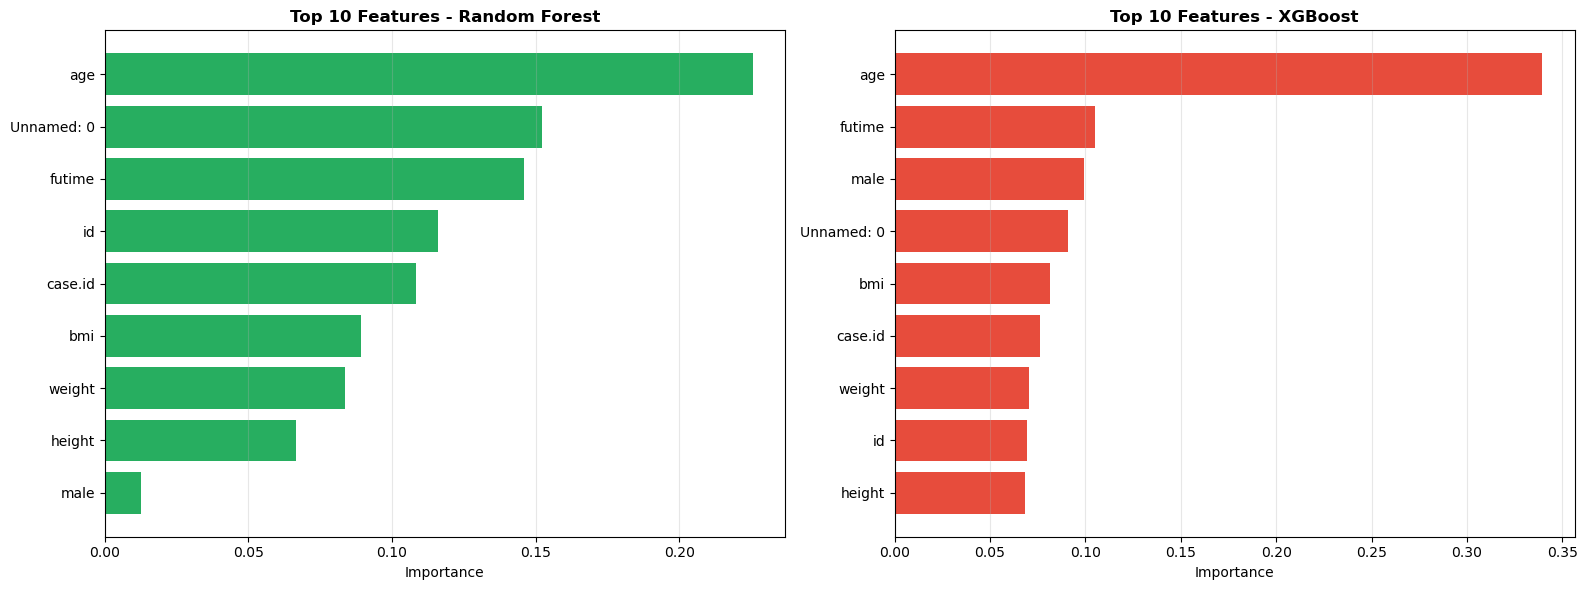

In [45]:
# Visualization 9: Feature Importance (Random Forest and XGBoost)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_model = models["Random Forest"]
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

axes[0].barh(rf_importance['Feature'], rf_importance['Importance'], color='#27ae60')
axes[0].set_xlabel('Importance')
axes[0].set_title('Top 10 Features - Random Forest', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

xgb_model = models["XGBoost"]
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

axes[1].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='#e74c3c')
axes[1].set_xlabel('Importance')
axes[1].set_title('Top 10 Features - XGBoost', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [46]:
# Print top features
print("\n" + "="*60)
print("TOP 10 PREDICTIVE FEATURES")
print("="*60)
print("\nRandom Forest:")
print(rf_importance.to_string(index=False))
print("\nXGBoost:")
print(xgb_importance.to_string(index=False))



TOP 10 PREDICTIVE FEATURES

Random Forest:
   Feature  Importance
       age    0.225468
Unnamed: 0    0.152333
    futime    0.145841
        id    0.116060
   case.id    0.108417
       bmi    0.089107
    weight    0.083522
    height    0.066679
      male    0.012575

XGBoost:
   Feature  Importance
       age    0.339517
    futime    0.104877
      male    0.099432
Unnamed: 0    0.090733
       bmi    0.081219
   case.id    0.076078
    weight    0.070630
        id    0.069438
    height    0.068075


In [48]:
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)
print(f"\nDataset: {df.shape[0]} patients with {df.shape[1]-1} features")
print(f"Target: Liver disease classification (Binary)")
print(f"Models Evaluated: {len(models)}")
print(f"\nBest Performing Model: {best_model_name}")
print(f"  - Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"  - Precision: {results_df.loc[best_model_name, 'Precision']:.4f}")
print(f"  - Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")
print(f"  - F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"  - ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']:.4f}")
print("\n" + "="*60)

print("\n All visualizations saved successfully!")
print(" Model performance metrics saved to CSV")
print(" Analysis complete!")


PROJECT SUMMARY

Dataset: 18011 patients with 9 features
Target: Liver disease classification (Binary)
Models Evaluated: 4

Best Performing Model: XGBoost
  - Accuracy: 0.9270
  - Precision: 0.5496
  - Recall: 0.2609
  - F1-Score: 0.3538
  - ROC-AUC: 0.8325


 All visualizations saved successfully!
 Model performance metrics saved to CSV
 Analysis complete!
